K-Means Clustering

In [45]:
import pandas as pd

# Load the PCA-reduced data
X_reduced = pd.read_csv('processed_data/pca_score.csv')


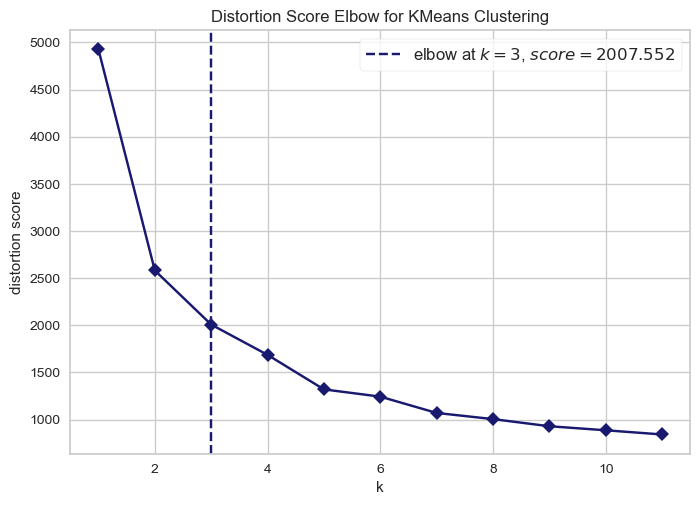

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)
visualizer.fit(X_reduced)  # X_reduced is your PCA-transformed data
# Access the line and set color to midnightblue
for line in visualizer.ax.lines:
    line.set_color('midnightblue')  # Set line color

# Show the visualizer
visualizer.show()

The Elbow Method looks at inertia (within-cluster sum of squares). It chooses k where adding more clusters stops significantly reducing inertia — the "elbow" point in the curve.

In [47]:
from sklearn.metrics import silhouette_score

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_reduced)
    score = silhouette_score(X_reduced, kmeans.labels_)
    print(f"k = {k}, silhouette score = {score:.4f}")


k = 2, silhouette score = 0.2302
k = 3, silhouette score = 0.4794
k = 4, silhouette score = 0.4652
k = 5, silhouette score = 0.4181
k = 6, silhouette score = 0.3761
k = 7, silhouette score = 0.3899
k = 8, silhouette score = 0.4344
k = 9, silhouette score = 0.4403
k = 10, silhouette score = 0.4396
k = 11, silhouette score = 0.4027


The best number of clusters is k = 3 because it has the highest silhouette score (0.4794). This means that, on average, points in the dataset are more tightly grouped within their clusters and well-separated from other clusters when k = 3.

In [48]:
# Initiate K-means clustering
kmeans_pca = KMeans(n_clusters = 3, init="k-means++")
kmeans_pca.fit(X_reduced)

KMeans(n_clusters=3)

In [54]:
df = pd.read_csv('processed_data/cleaned_data.csv')
# Concatinate cleaned dataframe (before encoding) to pca results
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(X_reduced)],axis=1)

# Rename Columns
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The Last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [55]:
df_segm_pca_kmeans.head()

,company_size,tech_comp_flag,tech_role_flag,mhl_coverage_flag,mhl_coverage_awareness_flag,mhl_employer_discussion_flag,mhl_resources_provided_flag,mhl_anonymity_flag,mhl_sick_leave,mhl_discussion_neg_impact,...,mhl_disorder_past_Yes,mhl_effective_treat_impact_on_work,mhl_disorder_past_No,mhl_disorder_current_Yes,mhl_disorder_current_No,mhl_family_history_No,Component 1,Component 2,Component 3,Segment K-means PCA
0,26-100,Yes,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,1.0,3.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,2
2,6-25,Yes,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,1.0,4.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,2
4,More than 1000,Yes,Yes,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1


In [56]:
# Create new column with logical naming
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
    {0:'First',
    1: 'Second',
    })

In [57]:
df_segm_pca_kmeans.head()

,company_size,tech_comp_flag,tech_role_flag,mhl_coverage_flag,mhl_coverage_awareness_flag,mhl_employer_discussion_flag,mhl_resources_provided_flag,mhl_anonymity_flag,mhl_sick_leave,mhl_discussion_neg_impact,...,mhl_effective_treat_impact_on_work,mhl_disorder_past_No,mhl_disorder_current_Yes,mhl_disorder_current_No,mhl_family_history_No,Component 1,Component 2,Component 3,Segment K-means PCA,Segment
0,26-100,Yes,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,Second
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,3.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,2,NaN
2,6-25,Yes,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,Second
3,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,4.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,2,NaN
4,More than 1000,Yes,Yes,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1,Second


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2361/428928346.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0.5, 0, 'Component 3')

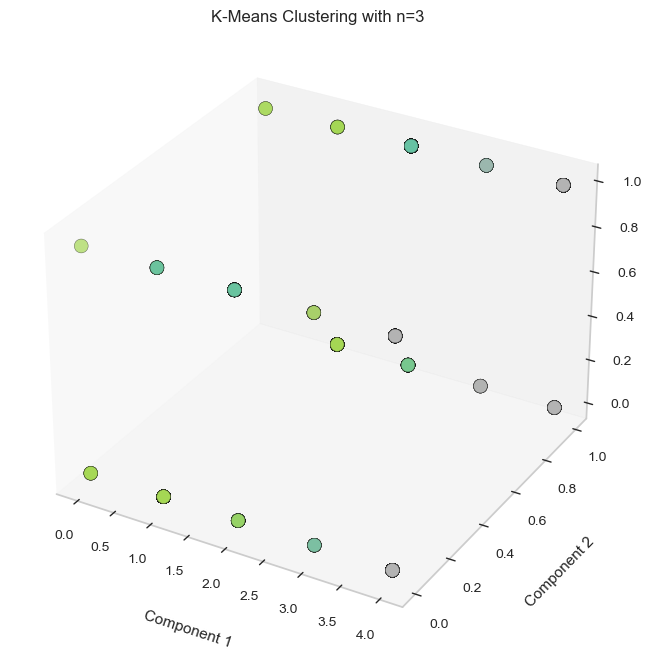

In [58]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# Fix X,Y,Z values based on PC
Xax = df_segm_pca_kmeans['Component 1']
Yax = df_segm_pca_kmeans['Component 2']
Zax = df_segm_pca_kmeans['Component 3']

# Create plot
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
cmap = ListedColormap(sns.color_palette("Set2"))
ax.scatter(Xax, Yax, Zax, c= df_segm_pca_kmeans["Segment K-means PCA"], cmap=cmap, edgecolor='k', s=100, alpha = 0.7)

# Add title
ax.grid(False)
ax.legend()
ax.set_title('K-Means Clustering with n=3')
ax.set_xlabel('Component 1', labelpad=20)
ax.set_ylabel('Component 2', labelpad=20)
ax.set_zlabel('Component 3', labelpad=20)